In [1]:
%pip install opencv-python tensorflow pillow scikit-learn matplotlib 'tensorflow[and-cuda]' face_recognition

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import metrics
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K
import face_recognition


2024-11-16 22:14:00.677701: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-16 22:14:00.700462: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-16 22:14:00.719558: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-16 22:14:00.724580: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-16 22:14:00.736704: I tensorflow/core/platform/cpu_feature_guar

In [3]:
# Verifica as GPUs disponíveis
gpus = tf.config.experimental.list_physical_devices('GPU')

# Verifica a configuração atual das GPUs
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))

os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

GPUs disponíveis: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


I0000 00:00:1731806044.595622  161726 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731806044.598632  161726 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1731806044.598861  161726 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [4]:
# Caminhos e parâmetros
data_dir = './faces'  # Pasta com os dados de treino
output_dir = './faces_detectadas'
img_width, img_height = 200, 200
padding = 40
batch_size = 10

# Cria o diretório de saída se não existir
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Inicializa o contador de imagens
img_counter = 0


In [5]:

# Varre cada subpasta dentro do diretório de dados
for person_name in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person_name)

    # Verifica se é um diretório (representando uma classe)
    if os.path.isdir(person_path):
        # Cria uma subpasta para a classe no diretório de saída
        class_output_dir = os.path.join(output_dir, person_name)
        os.makedirs(class_output_dir, exist_ok=True)

        # Itera sobre cada imagem na subpasta da classe
        for img_name in os.listdir(person_path):
            img_path = os.path.join(person_path, img_name)
            imagem = face_recognition.load_image_file(img_path)

            if imagem is not None:
                # Detecta rostos na imagem usando face_recognition
                localizacoes = face_recognition.face_locations(imagem, model="hog")  # Ou "hog" se não houver GPU

                # Para cada rosto detectado, recorta e salva a imagem
                for (top, right, bottom, left) in localizacoes:
                    face_img = imagem[top-padding:bottom+padding, left-padding:right+padding]
                    try:
                        resized_face = cv2.resize(face_img, (img_width, img_height))
                        # Define o nome do arquivo de saída
                        output_filename = f'img{img_counter}.jpg'
                        output_path = os.path.join(class_output_dir, output_filename)

                        # Salva a face detectada
                        cv2.imwrite(output_path, cv2.cvtColor(resized_face, cv2.COLOR_RGB2BGR))  # Converte RGB para BGR ao salvar
                        print(f'Face detectada salva em: {output_path}')
                    except:
                        print(f'Erro ao redimensionar imagem: {img_path}')
                        continue

                    # Incrementa o contador de imagens
                    img_counter += 1
            else:
                print(f'Erro ao carregar imagem: {img_path}')


Face detectada salva em: ./faces_detectadas/Araujo/img0.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img1.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img2.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img3.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img4.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img5.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img6.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img7.jpg
Face detectada salva em: ./faces_detectadas/Araujo/img8.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img9.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img10.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img11.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img12.jpg
Face detectada salva em: ./faces_detectadas/Giovanelli/img13.jpg
Face detectada salva em: ./faces_detectadas/Vinicin/img14.jpg
Face detectada salva em: ./faces_detectadas/Vinicin/img15.jpg
Face detecta

In [6]:
# Atualiza o diretório de dados para as faces detectadas
data_dir_faces = './faces_detectadas'

# Data augmentation e preparação do gerador de dados de treino para as faces detectadas
datagen_faces = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator_faces = datagen_faces.flow_from_directory(
    data_dir_faces,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator_faces = datagen_faces.flow_from_directory(
    data_dir_faces,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Impressão de informações do gerador
print("Classes detectadas: ", train_generator_faces.class_indices)
print("Número de imagens de treinamento: ", train_generator_faces.samples)
print("Número de imagens de validação: ", validation_generator_faces.samples)

Found 20 images belonging to 6 classes.
Found 4 images belonging to 6 classes.
Classes detectadas:  {'Araujo': 0, 'Bodruch': 1, 'Giovanelli': 2, 'Nery': 3, 'Thiago': 4, 'Vinicin': 5}
Número de imagens de treinamento:  20
Número de imagens de validação:  4


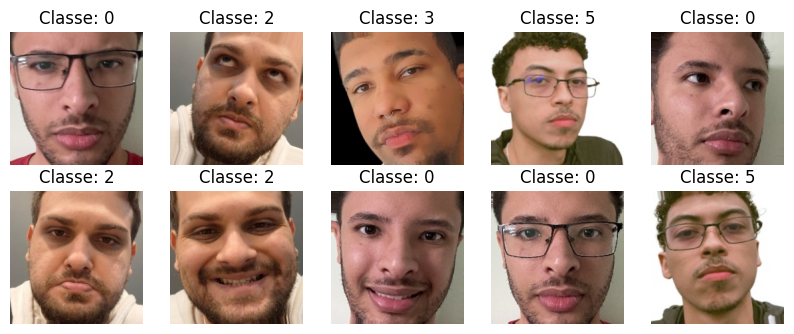

In [7]:
import matplotlib.pyplot as plt

# Carrega um lote de imagens do gerador de treinamento
images, labels = next(train_generator_faces)

# Mostra as primeiras imagens e seus labels
plt.figure(figsize=(10, 10))
for i in range(batch_size):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Classe: {labels[i].argmax()}")
    plt.axis('off')
plt.show()

In [8]:
# Caminhos e Parâmetros
data_dir = './faces_detectadas'
img_width, img_height = 150, 150

# Carregar e organizar os dados manualmente
images = []
labels = []
# Itera por cada subpasta que representa uma classe
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    if os.path.isdir(class_path):  # Verifica se é uma pasta
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Carrega a imagem e redimensiona
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)

                if img is not None:  # Verifica se a imagem foi carregada com sucesso
                    img = cv2.resize(img, (img_width, img_height))
                    
                    # Normaliza a imagem
                    img = img / 255.0
                    images.append(img)
                    labels.append(class_name)  # Usa o nome da subpasta como rótulo
                else:
                    print(f"Erro ao carregar a imagem: {img_path}")

# Verifica se existem imagens e rótulos antes de prosseguir
if not images or not labels:
    raise ValueError("Nenhuma imagem ou rótulo foi processado. Verifique o diretório de dados e o formato dos arquivos.")

# Converte as listas em arrays numpy
images = np.array(images)
labels = np.array(labels)

# Codificação das Labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
num_classes = len(label_encoder.classes_)

# Verifica se `num_classes` é maior que zero
if num_classes == 0:
    raise ValueError("Nenhuma classe foi detectada.")

labels_categorical = to_categorical(labels_encoded, num_classes)


In [9]:
def custom_recall(y_real, y_pred):
    true_positives = K.sum(K.round(K.clip(y_real * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_real, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def custom_precision(y_real, y_pred):
    true_positives = K.sum(K.round(K.clip(y_real * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def custom_f1(y_real, y_pred):
    precision = custom_precision(y_real, y_pred)
    recall = custom_recall(y_real, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [27]:

# Gerador de dados para aumento de dados

# Definição do Modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Primeira camada densa com Dropout
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    # Adiciona 18 camadas densas com Dropout
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='relu'),
    Dropout(0.2),
    
    # Camada de saída
    Dense(num_classes, activation='softmax')
])

model.summary()

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', metrics.Precision(), metrics.Recall()])

# Treinamento do Modelo (substitua `validation_generator_faces` pelo seu gerador de validação)
training_history = model.fit(train_generator_faces, epochs=95, validation_data=validation_generator_faces, verbose=1)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_78 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_79 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_80 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_81 (MaxPooling2D) │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 5, 5, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_82 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_293 (Dense)               │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_276 (Dropout)           │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_294 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_277 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_295 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_278 (Dropout)           │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_296 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_279 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_297 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_280 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_298 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_281 (Dropout)           │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_299 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_282 (Dropout)           │ (None, 8)              │             

 Total params: 1,121,418 (4.28 MB)

 Trainable params: 1,121,418 (4.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/95


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_293" is incompatible with the layer: expected axis -1 of input shape to have value 512, but received input with shape (None, 2048)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(15, 8))

# Plota a perda do treino e da validação com diferentes estilos e cores
plt.plot(training_history.history['loss'], label='Loss - Treinamento', color='blue', linestyle='-', linewidth=2)
plt.plot(training_history.history['val_loss'], label='Loss - Validação', color='orange', linestyle='--', linewidth=2)

# Adiciona título e rótulos com tamanhos maiores
plt.title('Desempenho do Modelo ao Longo das Épocas', fontsize=20, fontweight='bold')
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Perda (Loss)', fontsize=16)

# Adiciona uma grade leve para melhor leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Formata a legenda e define sua posição
plt.legend(loc='upper right', fontsize=14, title='Tipo de Loss', title_fontsize='13')

# Exibe o gráfico
plt.show()

In [ ]:

# print("Modelo treinado e salvo com sucesso.")
model.save('face_recognition_model_best.keras')

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Caminhos e parâmetros
test_dir = './faces'  # Diretório das imagens de teste
model_path = './face_recognition_model.keras'

# Parâmetros da imagem
img_width, img_height = 150, 150

# Carrega o modelo treinado
model = load_model(model_path)

# Recria o LabelEncoder usado no treinamento
label_encoder = LabelEncoder()
label_encoder.fit([d for d in os.listdir('./faces_detectadas') if os.path.isdir(os.path.join('./faces_detectadas', d))])
num_classes = len(label_encoder.classes_)

# Laço para processar cada subpasta (classe)
for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    
    if os.path.isdir(class_path):  # Verifica se é uma pasta
        for filename in os.listdir(class_path):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Caminho completo da imagem
                img_path = os.path.join(class_path, filename)
                
                # Carrega a imagem e redimensiona
                img = cv2.imread(img_path)
                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Converte para RGB
                    img_resized = cv2.resize(img_rgb, (img_width, img_height)) / 255.0
                    img_resized = np.expand_dims(img_resized, axis=0)
                    
                    # Realiza a predição
                    prediction = model.predict(img_resized)
                    predicted_class = np.argmax(prediction, axis=1)
                    predicted_label = label_encoder.inverse_transform(predicted_class)[0]

                    # Exibe a imagem com Matplotlib (ajustando o tamanho para exibição)
                    plt.figure(figsize=(4, 4))  # Ajuste o figsize conforme necessário
                    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converte de volta para RGB para o matplotlib
                    plt.title(predicted_label)
                    plt.axis('off')  # Remove eixos
                    plt.show()
                    cv2.waitKey(900)  # Aguarda por 900ms antes de fechar a imagem
                    cv2.destroyAllWindows()

In [ ]:
custom_f1()

In [ ]:
# # Carrega o modelo treinado
# model = load_model('./face_recognition_model.h5')

# # Dicionário de classes
# class_dict = {v: k for k, v in train_generator.class_indices.items()}
# df = cv2.CascadeClassifier('classifier.xml')

# input_dir = './faces/elvis'

# # Processa cada imagem na pasta 'faces'
# for filename in os.listdir(input_dir):
#     if filename.endswith('.jpg'):
#         file_path = os.path.join(input_dir, filename)
#         i = cv2.imread(file_path)
#         iPB = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

#         # Executa a detecção de faces
#         faces = df.detectMultiScale(iPB, scaleFactor=1.05, minNeighbors=7, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)

#         # Salva cada face detectada na nova pasta com rótulo
#         for j, (x, y, w, h) in enumerate(faces):
#             face = i[y:y+h, x:x+w]
#             face_resized = cv2.resize(face, (img_width, img_height))
#             face_normalized = face_resized / 255.0
#             face_reshaped = np.reshape(face_normalized, (1, img_width, img_height, 3))
#             prediction = model.predict(face_reshaped)
#             label = class_dict[np.argmax(prediction)]
#             face_filename = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}_{label}_{j}.jpg')
#             cv2.imwrite(face_filename, face)
#             cv2.rectangle(i, (x, y), (x + w, y + h), (0, 255, 255), 7)
#             cv2.putText(i, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

#         # Exibe a imagem com as faces detectadas e rotuladas
#         cv2.imshow(f'{filename} - {len(faces)} face(s) encontrada(s)', i)
#         cv2.waitKey(9900)
#         cv2.destroyAllWindows()
